Було використано mnist замість emnist через помилку у неправильних checksum`ах при завантаженні датасету через tensorflow_datasets версій 4.9.1, 4.9.2, 4.9.4.

Задля того, щоб не витрачати час дарма.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

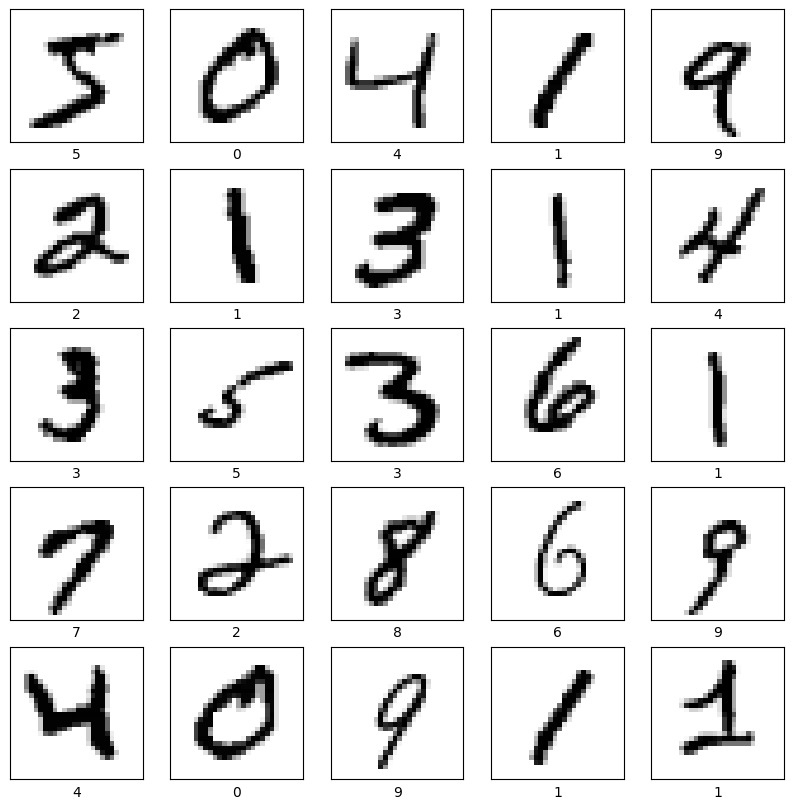

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1338 - accuracy: 0.9590 - val_loss: 0.0559 - val_accuracy: 0.9809
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0450 - accuracy: 0.9854 - val_loss: 0.0414 - val_accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0280 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0332 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0384 - val_accuracy: 0.9894


In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 - 1s - loss: 0.0384 - accuracy: 0.9894 - 506ms/epoch - 2ms/step
Test accuracy: 98.94%


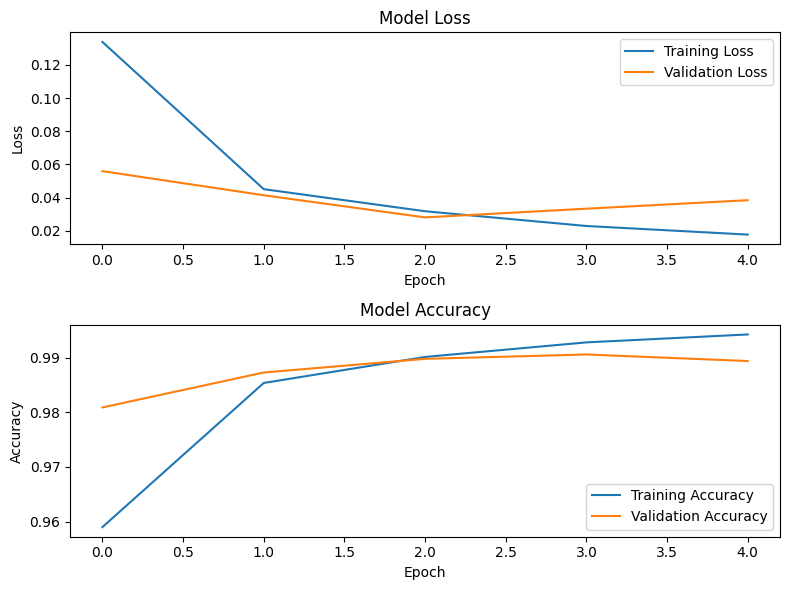

In [ ]:
plt.figure(figsize=(8, 6))

# Loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 1ms/step


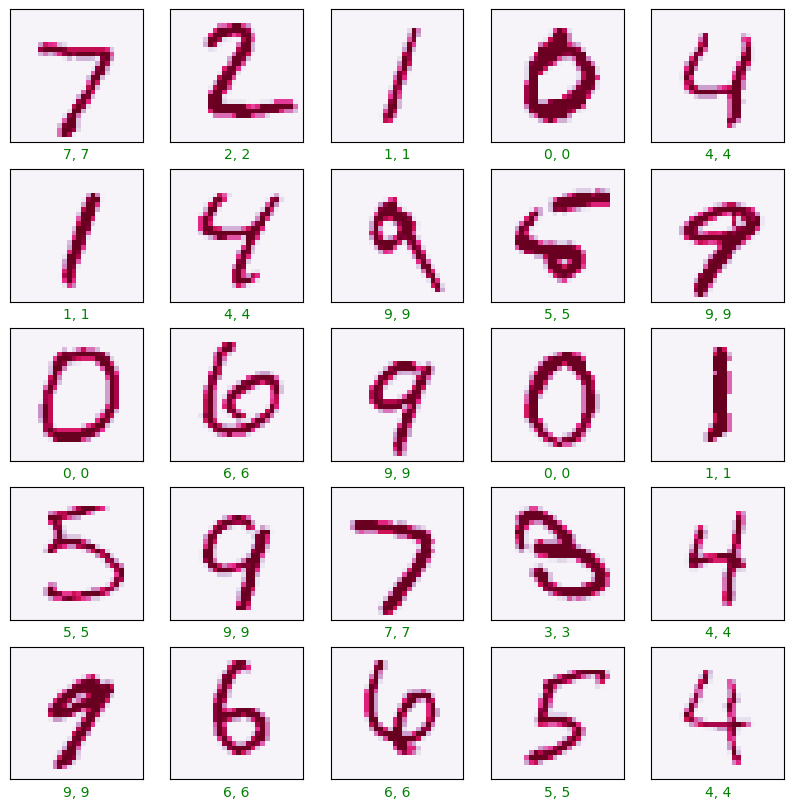

In [ ]:
# Plotting some examples of predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]), cmap=plt.cm.PuRd)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'{predicted_label}, {true_label}', color=color)
plt.show()